In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# DataSet 31

In [242]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book31.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,552,GANGETIC WEST BENGAL,1901,37.1,58.4,3.9,64.1,121.7,198.0,280.8,275.7,313.5,51.1,83.4,0.0,1487.6,95.5,189.7,1068.0,134.4
1,553,GANGETIC WEST BENGAL,1902,0.0,1.2,44.2,103.8,161.6,140.9,347.8,264.8,230.5,32.5,10.4,9.9,1347.7,1.2,309.6,984.0,52.9
2,554,GANGETIC WEST BENGAL,1903,17.5,24.6,37.3,30.6,78.5,201.7,179.6,277.6,300.7,198.0,8.2,0.0,1354.3,42.1,146.4,959.6,206.2
3,555,GANGETIC WEST BENGAL,1904,0.1,23.9,35.6,17.5,160.2,286.7,435.3,241.7,142.8,35.1,4.1,0.1,1383.1,24.0,213.3,1106.4,39.3
4,556,GANGETIC WEST BENGAL,1905,30.9,49.6,84.7,84.9,156.8,70.9,525.5,263.6,287.6,107.3,0.0,5.2,1666.9,80.5,326.3,1147.6,112.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,662,GANGETIC WEST BENGAL,2011,2.5,2.7,40.5,75.0,132.6,434.5,219.9,443.2,295.9,36.9,1.3,1.4,1686.5,5.2,248.1,1393.6,39.6
111,663,GANGETIC WEST BENGAL,2012,40.7,15.3,4.4,57.7,44.2,146.6,315.0,261.4,246.9,64.2,47.0,24.6,1268.0,56.0,106.3,969.9,135.8
112,664,GANGETIC WEST BENGAL,2013,2.5,10.0,4.8,45.6,195.9,233.4,263.2,401.4,254.0,353.2,0.0,0.0,1764.1,12.5,246.3,1152.0,353.3
113,665,GANGETIC WEST BENGAL,2014,0.9,42.2,19.9,1.9,124.4,193.6,298.7,292.6,229.5,56.9,0.1,0.6,1261.4,43.1,146.2,1014.4,57.7


In [243]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

In [244]:
b=a.fillna(method='ffill')
b

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,552,GANGETIC WEST BENGAL,1901,37.1,58.4,3.9,64.1,121.7,198.0,280.8,275.7,313.5,51.1,83.4,0.0,1487.6,95.5,189.7,1068.0,134.4
1,553,GANGETIC WEST BENGAL,1902,0.0,1.2,44.2,103.8,161.6,140.9,347.8,264.8,230.5,32.5,10.4,9.9,1347.7,1.2,309.6,984.0,52.9
2,554,GANGETIC WEST BENGAL,1903,17.5,24.6,37.3,30.6,78.5,201.7,179.6,277.6,300.7,198.0,8.2,0.0,1354.3,42.1,146.4,959.6,206.2
3,555,GANGETIC WEST BENGAL,1904,0.1,23.9,35.6,17.5,160.2,286.7,435.3,241.7,142.8,35.1,4.1,0.1,1383.1,24.0,213.3,1106.4,39.3
4,556,GANGETIC WEST BENGAL,1905,30.9,49.6,84.7,84.9,156.8,70.9,525.5,263.6,287.6,107.3,0.0,5.2,1666.9,80.5,326.3,1147.6,112.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,662,GANGETIC WEST BENGAL,2011,2.5,2.7,40.5,75.0,132.6,434.5,219.9,443.2,295.9,36.9,1.3,1.4,1686.5,5.2,248.1,1393.6,39.6
111,663,GANGETIC WEST BENGAL,2012,40.7,15.3,4.4,57.7,44.2,146.6,315.0,261.4,246.9,64.2,47.0,24.6,1268.0,56.0,106.3,969.9,135.8
112,664,GANGETIC WEST BENGAL,2013,2.5,10.0,4.8,45.6,195.9,233.4,263.2,401.4,254.0,353.2,0.0,0.0,1764.1,12.5,246.3,1152.0,353.3
113,665,GANGETIC WEST BENGAL,2014,0.9,42.2,19.9,1.9,124.4,193.6,298.7,292.6,229.5,56.9,0.1,0.6,1261.4,43.1,146.2,1014.4,57.7


<AxesSubplot:>

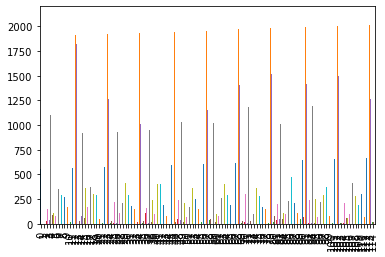

In [245]:
b.plot.bar(legend=None)

<AxesSubplot:>

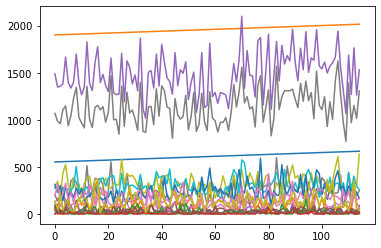

In [246]:
b.plot.line(legend=None)

<AxesSubplot:>

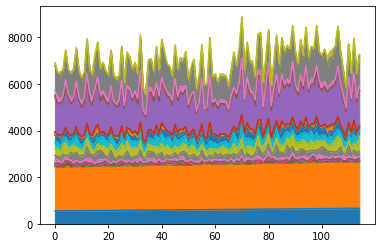

In [247]:
b.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

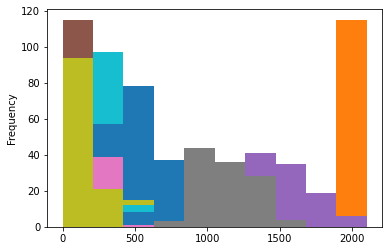

In [248]:
b.plot.hist(legend=None)

<AxesSubplot:ylabel='YEAR'>

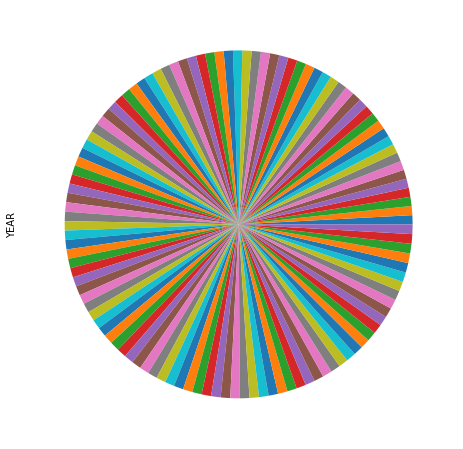

In [249]:
b.plot.pie(y='YEAR',figsize=(8,8),labels=None,legend=None)

# DataSet 32

In [250]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book32.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,667,ORISSA,1901,39.5,65.1,16.1,51.6,79.0,78.2,288.4,307.7,185.3,76.6,96.7,0.0,1284.2,104.6,146.7,859.6,173.3
1,668,ORISSA,1902,3.4,0.2,14.2,101.1,56.7,108.3,437.4,349.1,202.7,33.2,13.0,29.6,1349.0,3.5,172.1,1097.6,75.8
2,669,ORISSA,1903,19.7,18.9,10.5,34.6,73.3,154.3,410.4,295.2,265.6,228.5,46.2,11.0,1568.3,38.6,118.5,1125.5,285.7
3,670,ORISSA,1904,0.2,12.2,20.6,10.1,100.2,342.9,336.7,350.4,227.8,111.8,0.0,1.9,1514.8,12.4,130.9,1257.8,113.7
4,671,ORISSA,1905,24.3,17.2,66.3,56.9,107.5,92.0,330.1,281.4,344.1,36.4,0.7,0.4,1357.3,41.5,230.7,1047.6,37.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,777,ORISSA,2011,3.7,16.2,4.9,58.2,75.6,210.1,199.6,358.6,398.7,20.2,0.1,0.4,1346.2,19.8,138.7,1167.0,20.7
111,778,ORISSA,2012,50.8,3.6,0.9,34.8,21.3,169.6,324.3,417.0,242.4,66.0,72.1,3.1,1405.9,54.4,57.0,1153.3,141.3
112,779,ORISSA,2013,3.3,7.8,2.1,53.6,57.7,272.6,380.0,254.9,208.1,391.0,1.2,0.0,1632.4,11.2,113.4,1115.6,392.2
113,780,ORISSA,2014,0.0,17.6,25.1,11.7,111.9,92.2,496.2,386.3,281.1,111.8,2.2,0.9,1536.9,17.7,148.7,1255.7,114.8


In [251]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

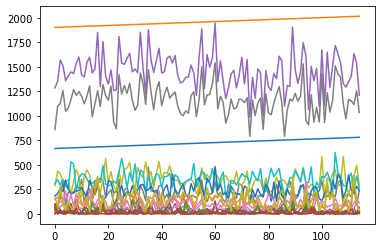

In [252]:
a.plot.line(legend=None)

<AxesSubplot:>

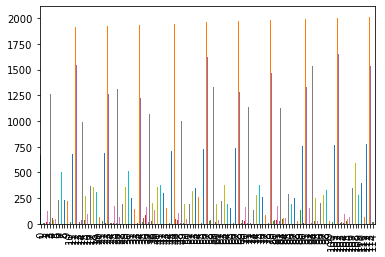

In [253]:
a.plot.bar(legend=None)

<AxesSubplot:>

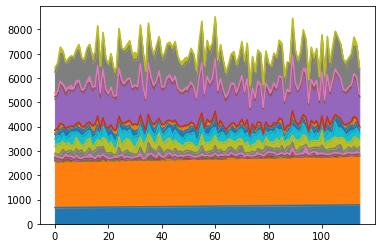

In [254]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

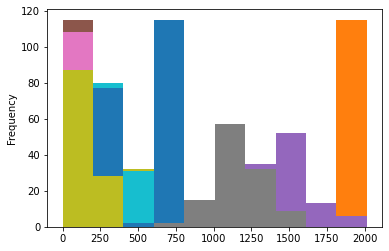

In [255]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='MAY'>

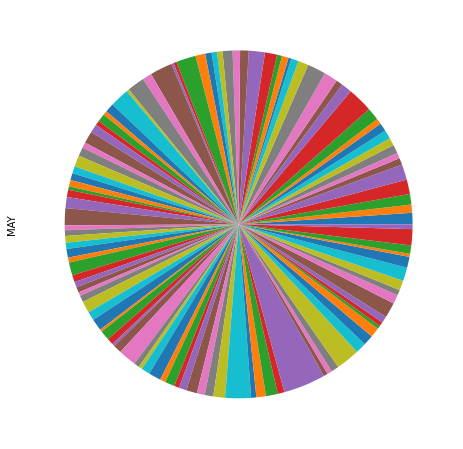

In [256]:
a.plot.pie(y='MAY',figsize=(8,8),labels=None,legend=None)

# DataSet 33

In [257]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book33.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,782,JHARKHAND,1901,92.7,66.6,11.1,18.4,33.5,70.9,269.4,415.1,248.0,37.3,11.5,0.0,1274.5,159.3,63.0,1003.4,48.8
1,783,JHARKHAND,1902,4.2,7.7,13.2,28.5,59.8,89.9,456.1,204.9,306.6,17.6,5.9,3.2,1197.6,11.9,101.5,1057.5,26.7
2,784,JHARKHAND,1903,25.1,19.5,10.7,32.8,56.4,142.1,206.1,280.8,190.2,210.1,0.5,0.0,1174.3,44.6,99.9,819.3,210.6
3,785,JHARKHAND,1904,2.5,17.0,38.1,9.1,116.1,308.9,494.1,336.1,125.6,30.6,2.3,0.4,1480.7,19.6,163.3,1264.6,33.3
4,786,JHARKHAND,1905,38.4,53.3,61.6,32.9,66.2,41.5,420.3,293.7,322.8,21.3,0.0,2.7,1354.7,91.7,160.7,1078.3,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,892,JHARKHAND,2011,3.3,2.5,6.4,25.4,55.0,349.0,181.8,403.2,324.6,23.3,0.0,0.1,1374.7,5.8,86.8,1258.7,23.4
111,893,JHARKHAND,2012,34.6,10.3,1.5,9.6,6.6,121.1,287.2,282.4,217.6,37.8,48.6,7.6,1065.0,45.0,17.7,908.3,94.0
112,894,JHARKHAND,2013,1.1,17.9,1.6,22.3,85.0,181.5,211.1,278.1,173.8,281.1,0.0,0.0,1253.6,19.0,109.0,844.5,281.1
113,895,JHARKHAND,2014,9.9,47.5,22.9,1.9,98.2,139.7,321.3,290.9,178.2,44.9,0.0,1.2,1156.6,57.4,123.1,930.1,46.1


In [258]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

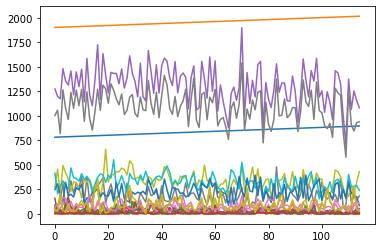

In [259]:
a.plot.line(legend=None)

<AxesSubplot:>

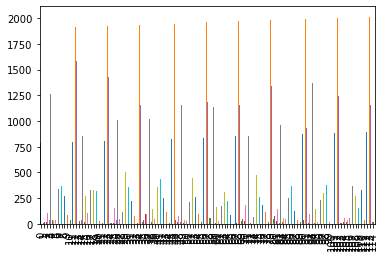

In [260]:
a.plot.bar(legend=None)

<AxesSubplot:>

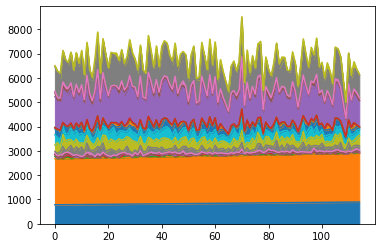

In [261]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

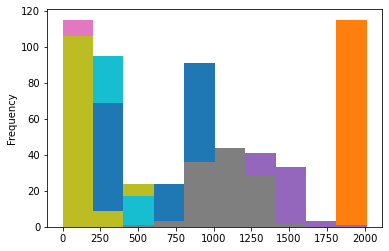

In [262]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='FEB'>

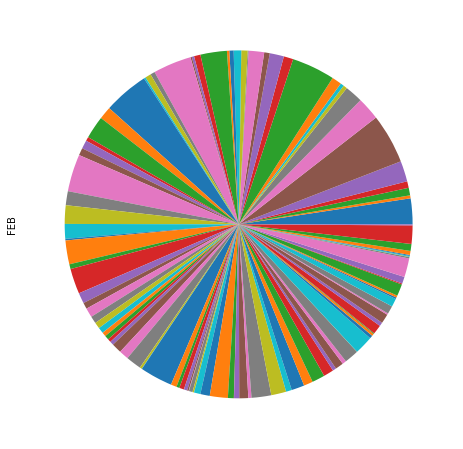

In [263]:
a.plot.pie(y='FEB',figsize=(8,8),labels=None,legend=None)

# DataSet 34

In [264]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book34.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,897,BIHAR,1901,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,8.3,7.3,0.1,952.3,71.4,78.6,786.7,15.6
1,898,BIHAR,1902,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,28.5,1.1,0.0,1206.2,5.2,107.9,1063.4,29.6
2,899,BIHAR,1903,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,147.0,0.1,0.0,1016.3,10.0,34.9,824.4,147.1
3,900,BIHAR,1904,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,98.1,10.6,3.8,1269.5,7.9,127.4,1021.8,112.4
4,901,BIHAR,1905,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,11.6,0.0,0.6,1498.5,46.1,131.4,1308.8,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1007,BIHAR,2011,4.2,7.7,9.2,23.9,74.5,211.0,241.1,278.7,234.1,10.0,2.0,0.9,1097.1,11.8,107.6,964.8,12.9
111,1008,BIHAR,2012,18.1,2.7,7.3,20.4,18.8,96.2,354.0,240.4,233.8,34.3,6.4,0.0,1032.4,20.9,46.5,924.4,40.6
112,1009,BIHAR,2013,5.1,22.6,0.6,32.3,89.5,183.3,182.0,213.6,143.3,197.1,0.4,0.0,1069.9,27.7,122.4,722.2,197.5
113,1010,BIHAR,2014,17.0,33.5,8.4,0.7,103.9,115.2,265.4,307.6,160.3,47.8,0.0,1.2,1061.0,50.5,112.9,848.6,49.0


In [265]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

In [266]:
b=a.fillna(method='ffill')
b

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,897,BIHAR,1901,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,8.3,7.3,0.1,952.3,71.4,78.6,786.7,15.6
1,898,BIHAR,1902,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,28.5,1.1,0.0,1206.2,5.2,107.9,1063.4,29.6
2,899,BIHAR,1903,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,147.0,0.1,0.0,1016.3,10.0,34.9,824.4,147.1
3,900,BIHAR,1904,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,98.1,10.6,3.8,1269.5,7.9,127.4,1021.8,112.4
4,901,BIHAR,1905,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,11.6,0.0,0.6,1498.5,46.1,131.4,1308.8,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1007,BIHAR,2011,4.2,7.7,9.2,23.9,74.5,211.0,241.1,278.7,234.1,10.0,2.0,0.9,1097.1,11.8,107.6,964.8,12.9
111,1008,BIHAR,2012,18.1,2.7,7.3,20.4,18.8,96.2,354.0,240.4,233.8,34.3,6.4,0.0,1032.4,20.9,46.5,924.4,40.6
112,1009,BIHAR,2013,5.1,22.6,0.6,32.3,89.5,183.3,182.0,213.6,143.3,197.1,0.4,0.0,1069.9,27.7,122.4,722.2,197.5
113,1010,BIHAR,2014,17.0,33.5,8.4,0.7,103.9,115.2,265.4,307.6,160.3,47.8,0.0,1.2,1061.0,50.5,112.9,848.6,49.0


<AxesSubplot:>

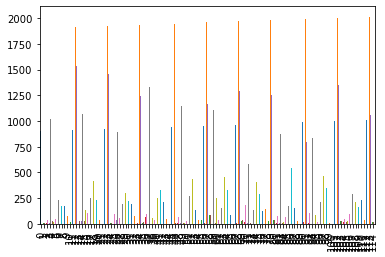

In [267]:
b.plot.bar(legend=None)

<AxesSubplot:>

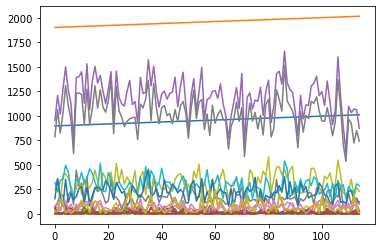

In [268]:
b.plot.line(legend=None)

<AxesSubplot:>

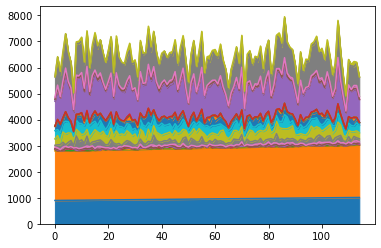

In [269]:
b.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

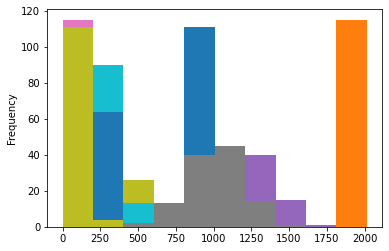

In [270]:
b.plot.hist(legend=None)

<AxesSubplot:ylabel='JUL'>

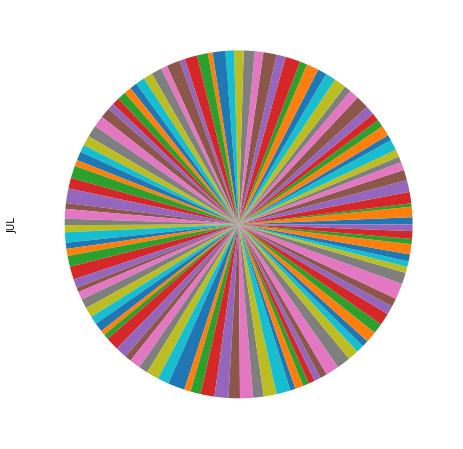

In [271]:
b.plot.pie(y='JUL',figsize=(8,8),labels=None,legend=None)

# DataSet 35

In [272]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book35.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1012,EAST UTTAR PRADESH,1901,62.6,31.3,8.2,1.1,13.6,21.8,226.5,285.6,215.4,4.9,0.1,2.1,873.2,93.9,22.9,749.3,7.1
1,1013,EAST UTTAR PRADESH,1902,6.1,2.3,2.4,2.0,21.4,32.5,411.5,155.4,257.2,13.2,1.2,0.0,905.2,8.3,25.9,856.6,14.5
2,1014,EAST UTTAR PRADESH,1903,8.2,0.4,1.3,0.7,15.3,71.6,115.3,420.2,258.7,324.7,0.0,0.0,1216.4,8.6,17.3,865.8,324.7
3,1015,EAST UTTAR PRADESH,1904,7.3,1.5,8.3,0.4,28.7,148.0,359.4,328.8,95.0,50.6,17.0,26.3,1071.2,8.8,37.4,931.1,93.9
4,1016,EAST UTTAR PRADESH,1905,16.8,23.6,20.0,5.4,15.4,17.3,302.4,316.2,169.5,3.3,0.0,1.6,891.6,40.5,40.9,805.4,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1122,EAST UTTAR PRADESH,2011,1.0,2.7,1.6,2.9,32.2,163.8,197.9,232.1,146.4,0.6,0.0,0.0,781.2,3.7,36.7,740.2,0.6
111,1123,EAST UTTAR PRADESH,2012,20.3,1.2,3.4,2.8,0.2,18.5,234.2,156.0,164.4,0.7,0.3,0.7,602.7,21.5,6.4,573.1,1.8
112,1124,EAST UTTAR PRADESH,2013,6.1,59.6,2.7,8.7,1.1,309.7,230.0,246.1,78.2,97.4,0.5,1.1,1041.4,65.8,12.6,864.0,99.0
113,1125,EAST UTTAR PRADESH,2014,47.4,25.8,15.4,1.7,10.7,47.8,224.5,138.1,106.7,74.7,0.0,8.4,701.2,73.3,27.7,517.1,83.1


In [273]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

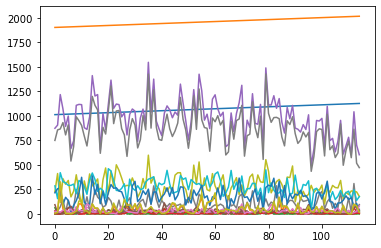

In [274]:
a.plot.line(legend=None)

<AxesSubplot:>

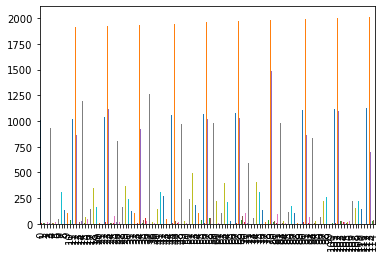

In [275]:
a.plot.bar(legend=None)

<AxesSubplot:>

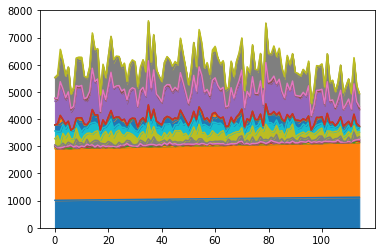

In [276]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

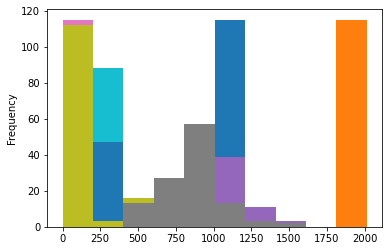

In [277]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='MAR'>

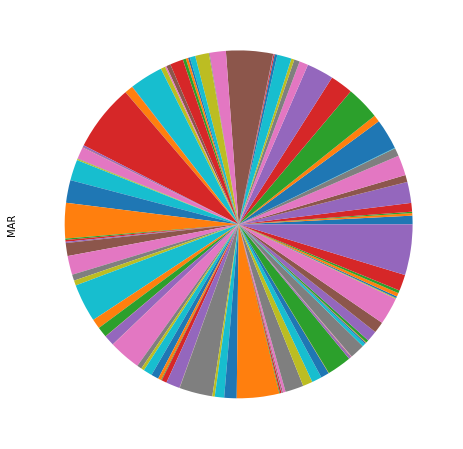

In [278]:
a.plot.pie(y='MAR',figsize=(8,8),labels=None,legend=None)

# DataSet 36

In [279]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book36.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1242,UTTARAKHAND,1901,134.5,81.4,44.5,5.9,60.8,33.6,381.1,612.3,167.1,16.3,0.0,24.9,1562.5,215.9,111.3,1194.1,41.3
1,1243,UTTARAKHAND,1902,0.0,17.0,52.2,63.7,52.1,113.1,444.1,327.5,220.4,31.9,2.1,0.0,1324.2,17.1,168.1,1105.1,34.0
2,1244,UTTARAKHAND,1903,68.0,7.9,87.6,10.3,37.5,83.0,251.6,442.7,249.3,57.5,0.0,11.3,1306.5,75.9,135.4,1026.5,68.7
3,1245,UTTARAKHAND,1904,40.0,5.2,78.3,13.6,61.1,180.1,449.6,417.2,174.1,6.3,35.6,31.0,1492.0,45.2,153.0,1221.0,72.9
4,1246,UTTARAKHAND,1905,115.4,80.7,99.8,26.1,70.3,111.5,299.9,349.5,129.5,0.0,1.0,18.5,1302.1,196.0,196.2,890.4,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1352,UTTARAKHAND,2011,30.9,65.2,18.0,30.9,84.2,223.1,433.3,523.7,148.4,3.4,1.2,2.3,1564.7,96.1,133.1,1328.5,6.9
111,1353,UTTARAKHAND,2012,38.8,11.9,28.1,39.2,9.1,46.0,387.1,419.5,220.6,4.7,3.4,15.5,1223.9,50.8,76.4,1073.1,23.6
112,1354,UTTARAKHAND,2013,73.0,188.3,22.0,24.7,18.2,488.9,413.4,359.4,111.3,29.1,3.2,3.8,1735.4,261.3,65.0,1373.0,36.2
113,1355,UTTARAKHAND,2014,45.9,99.9,68.4,37.6,52.9,62.9,462.7,264.2,107.9,40.8,0.0,44.3,1287.4,145.8,158.8,897.7,85.1


In [280]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

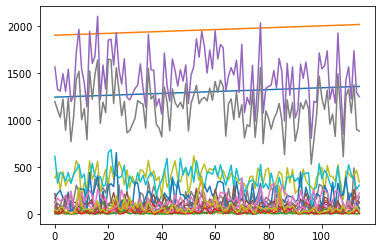

In [281]:
a.plot.line(legend=None)

<AxesSubplot:>

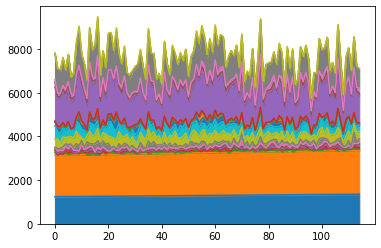

In [282]:
a.plot.area(legend=None)

<AxesSubplot:>

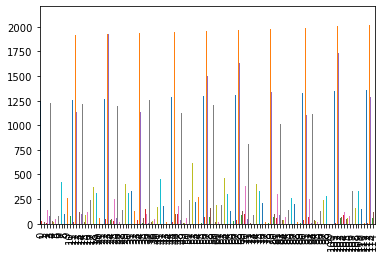

In [283]:
a.plot.bar(legend=None)

<AxesSubplot:ylabel='Frequency'>

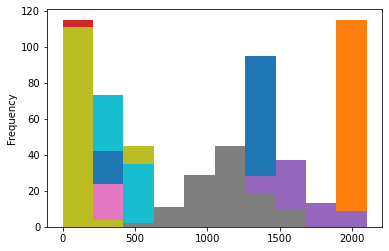

In [284]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='DEC'>

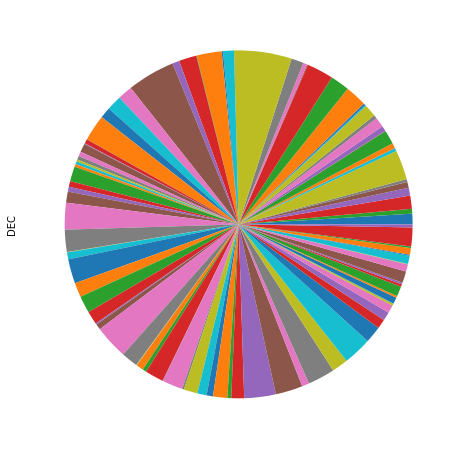

In [285]:
a.plot.pie(y='DEC',figsize=(8,8),labels=None,legend=None)